## Практикуемся решать задачу регрессии!

### Будем предсказывать цену дома 📝

ВАЖНО: При построении графиков не забывайте указать название графика и обозначить, что изображено по каждой из осей

В блоке ниже импортируйте все библиотеки, которые вам понадобятся для запуска ноутбука

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# some lib

**Скачайте необходимые данные по ссылке: https://www.kaggle.com/c/house-prices-advanced-regression-techniques**

In [320]:
data = pd.read_csv('train.csv', header=0)

✅ Посмотрите, как выглядят данные, и приступайте к анализу

In [322]:
data.shape

(1460, 81)

In [324]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
data['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [326]:
df = data.drop('Alley', axis = 1)

In [37]:
df['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

✅ Если в данных бессмысленные столбцы? Если да, избавьтесь от них и объясните, почему так поступили.

In [328]:
df = df.drop('PoolQC', axis = 1)

In [43]:
df[['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
0,196.0,BrkFace
1,0.0,NaN
2,162.0,BrkFace
3,0.0,NaN
4,350.0,BrkFace
...,...,...
1455,0.0,NaN
1456,119.0,Stone
1457,0.0,NaN
1458,0.0,NaN


In [47]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [330]:
df = df.drop('Fence', axis = 1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [332]:
df = df.drop('MiscFeature', axis = 1)

In [81]:
df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'].head(20)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,YearBuilt
0,Attchd,2003.0,RFn,2,548,TA,TA,2003
1,Attchd,1976.0,RFn,2,460,TA,TA,1976
2,Attchd,2001.0,RFn,2,608,TA,TA,2001
3,Detchd,1998.0,Unf,3,642,TA,TA,1915
4,Attchd,2000.0,RFn,3,836,TA,TA,2000
5,Attchd,1993.0,Unf,2,480,TA,TA,1993
6,Attchd,2004.0,RFn,2,636,TA,TA,2004
7,Attchd,1973.0,RFn,2,484,TA,TA,1973
8,Detchd,1931.0,Unf,2,468,Fa,TA,1931
9,Attchd,1939.0,RFn,1,205,Gd,TA,1939


In [334]:
df = df.drop('GarageCond', axis = 1)

In [336]:
df = df.drop('GarageArea', axis = 1)

In [97]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [338]:
df = df.drop('Utilities', axis = 1)

In [111]:
df['LandSlope'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

In [129]:
df[['LotShape', 'LandContour', 'LotConfig', 'LandSlope']].head(-50)

,LotShape,LandContour,LotConfig,LandSlope
0,Reg,Lvl,Inside,Gtl
1,Reg,Lvl,FR2,Gtl
2,IR1,Lvl,Inside,Gtl
3,IR1,Lvl,Corner,Gtl
4,IR1,Lvl,FR2,Gtl
...,...,...,...,...
1405,IR1,HLS,Inside,Mod
1406,Reg,Lvl,Corner,Gtl
1407,IR1,Lvl,Corner,Gtl
1408,Reg,Lvl,Inside,Gtl


In [340]:
df = df.drop('LandSlope', axis = 1)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [139]:
df[['Condition1', 'Condition2' ]]

,Condition1,Condition2
0,Norm,Norm
1,Feedr,Norm
2,Norm,Norm
3,Norm,Norm
4,Norm,Norm
...,...,...
1455,Norm,Norm
1456,Norm,Norm
1457,Norm,Norm
1458,Norm,Norm


In [342]:
df = df.drop('Condition2', axis = 1)

In [149]:
df[['BldgType', 'HouseStyle']]

,BldgType,HouseStyle
0,1Fam,2Story
1,1Fam,1Story
2,1Fam,2Story
3,1Fam,2Story
4,1Fam,2Story
...,...,...
1455,1Fam,2Story
1456,1Fam,1Story
1457,1Fam,2Story
1458,1Fam,1Story


In [166]:
df[['YearBuilt', 'YearRemodAdd']]

,YearBuilt,YearRemodAdd
0,2003,2003
1,1976,1976
2,2001,2002
3,1915,1970
4,2000,2000
...,...,...
1455,1999,2000
1456,1978,1988
1457,1941,2006
1458,1950,1996


In [168]:
cors = df[['YearBuilt', 'YearRemodAdd', 'SalePrice']]

In [170]:
cors.corr()

,YearBuilt,YearRemodAdd,SalePrice
YearBuilt,1.000000,0.592855,0.522897
YearRemodAdd,0.592855,1.000000,0.507101
SalePrice,0.522897,0.507101,1.000000


<Axes: >

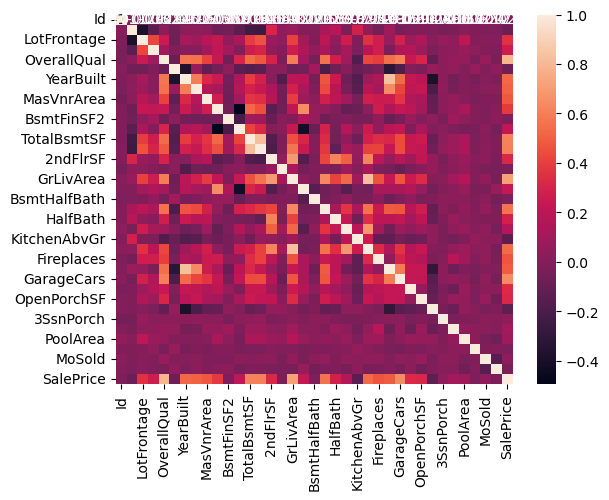

In [344]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt = '.3g')

In [346]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [184]:
df['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [186]:
df['RoofStyle'].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [198]:
df[['Exterior1st', 'Exterior2nd']].head(20)

,Exterior1st,Exterior2nd
0,VinylSd,VinylSd
1,MetalSd,MetalSd
2,VinylSd,VinylSd
3,Wd Sdng,Wd Shng
4,VinylSd,VinylSd
5,VinylSd,VinylSd
6,VinylSd,VinylSd
7,HdBoard,HdBoard
8,BrkFace,Wd Shng
9,MetalSd,MetalSd


In [348]:
df = df.drop('MasVnrType', axis = 1)


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [222]:
df['FireplaceQu'].nunique()

5

In [228]:
np.array(df.nunique())

array([1460,   15,    5,  110, 1073,    2,    4,    4,    5,   25,    9,
          5,    8,   10,    9,  112,   61,    6,    8,   15,   16,  327,
          4,    5,    6,    4,    4,    4,    6,  637,    6,  144,  780,
        721,    6,    5,    2,    5,  753,  417,   24,  861,    4,    3,
          4,    3,    8,    4,    4,   12,    7,    4,    5,    6,   97,
          3,    5,    5,    3,  274,  202,  120,   20,   76,    8,   21,
         12,    5,    9,    6,  663])

In [244]:
df[df['BsmtCond'] == 'Po']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
375,376,30,RL,NaN,10020,Pave,IR1,Low,Inside,Edwards,...,0,0,0,0,0,3,2009,WD,Normal,61000
398,399,30,RM,60.0,8967,Pave,Reg,Lvl,Corner,IDOTRR,...,0,0,0,0,0,11,2007,WD,Abnorml,67000


In [254]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [258]:
df[df['BsmtCond'] == 'Gd'][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].head(50)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
3,TA,Gd,No,ALQ,216,Unf,0,540,756
62,Gd,Gd,Mn,GLQ,24,Unf,0,1346,1370
81,Ex,Gd,No,GLQ,1201,Unf,0,36,1237
95,Gd,Gd,No,ALQ,310,Unf,0,370,680
171,TA,Gd,Gd,BLQ,639,Unf,0,441,1080
172,Gd,Gd,No,GLQ,495,Rec,215,354,1064
175,TA,Gd,Av,ALQ,477,Unf,0,725,1202
190,Gd,Gd,No,Rec,297,Unf,0,556,853
233,TA,Gd,Av,LwQ,182,ALQ,712,0,894
262,Gd,Gd,Av,ALQ,506,Unf,0,0,506


✅ Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

✅ Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. 

In [350]:
df.isnull().sum().head(60)

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
LotShape          0
LandContour       0
LotConfig         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0


In [352]:
df['LotFrontage'] = df['LotFrontage'].fillna(value = 0)

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [386]:
bsmt = df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

In [388]:
bsmt[bsmt['BsmtQual'].isna()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0


In [390]:
bsmt['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [392]:
bsmt['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [394]:
bsmt['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [396]:
bsmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1423 non-null   object
 1   BsmtCond      1423 non-null   object
 2   BsmtExposure  1422 non-null   object
 3   BsmtFinType1  1423 non-null   object
 4   BsmtFinSF1    1460 non-null   int64 
 5   BsmtFinType2  1422 non-null   object
 6   BsmtFinSF2    1460 non-null   int64 
 7   BsmtUnfSF     1460 non-null   int64 
 8   TotalBsmtSF   1460 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 102.8+ KB


In [ ]:
По данным делаем вывод что подвал просто отсутствует, тогда в объектах null берем None

In [406]:
df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].fillna(value = 'None')

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [424]:
df[df['MasVnrArea'].isna()]['MasVnrArea']

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

In [ ]:
заполним 0 

In [426]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(value = 0)

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [432]:
df['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [ ]:
заменю на наиболее частое

In [434]:
df['Electrical'].fillna('SBrkr', inplace=True)

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [442]:
df[['Fireplaces', 'SalePrice']].corr()

,Fireplaces,SalePrice
Fireplaces,1.000000,0.466929
SalePrice,0.466929,1.000000


In [440]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [ ]:
заполним None

In [444]:
df['FireplaceQu'].fillna(value='None', inplace=True)

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [452]:
gar = df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual']]

In [456]:
gar[gar['GarageType'].isna()].head(50)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual
39,NaN,NaN,NaN,0,NaN
48,NaN,NaN,NaN,0,NaN
78,NaN,NaN,NaN,0,NaN
88,NaN,NaN,NaN,0,NaN
89,NaN,NaN,NaN,0,NaN
99,NaN,NaN,NaN,0,NaN
108,NaN,NaN,NaN,0,NaN
125,NaN,NaN,NaN,0,NaN
127,NaN,NaN,NaN,0,NaN
140,NaN,NaN,NaN,0,NaN


In [ ]:
меняем также на None тк гаражи могут отстуствовать

In [460]:
df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageType    1379 non-null   object 
 1   GarageYrBlt   1379 non-null   float64
 2   GarageFinish  1379 non-null   object 
 3   GarageCars    1460 non-null   int64  
 4   GarageQual    1379 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 57.2+ KB


In [462]:
df['GarageType'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageYrBlt'].fillna(0, inplace=True)

In [474]:
df.isnull().sum().head(60)


Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
LotConfig       0
Neighborhood    0
Condition1      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFini

In [484]:
df.isna().sum().tail(12)

WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

✅ Проверьте, что вы действительно избавились от пропусков

In [ ]:
я избавился

✅ Обработайте категориальные признаки. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [488]:
 obj = df.select_dtypes(include=['object'])

In [500]:
obj.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
LotConfig         5
Neighborhood     25
Condition1        9
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [504]:
obj


,MSZoning,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,None,Attchd,RFn,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,...,SBrkr,TA,Typ,TA,Attchd,RFn,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,Inside,Gilbert,Norm,1Fam,2Story,Gable,...,SBrkr,TA,Typ,TA,Attchd,RFn,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,Inside,NWAmes,Norm,1Fam,1Story,Gable,...,SBrkr,TA,Min1,TA,Attchd,Unf,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,Inside,Crawfor,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,Inside,NAmes,Norm,1Fam,1Story,Hip,...,FuseA,Gd,Typ,None,Attchd,Unf,TA,Y,WD,Normal


In [ ]:
я выбираю label encoding тк как в наборе данных оч много признаков

In [506]:
from sklearn.preprocessing import LabelEncoder

In [508]:
label_encoder = LabelEncoder()

In [510]:


# Применение Label Encoding ко всем категориальным столбцам
for column in df.columns:
    if df[column].dtype == 'object':  # Только для категориальных столбцов
        df[column] = label_encoder.fit_transform(df[column])

In [512]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,4,5,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,2,24,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,4,5,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,2,15,...,0,0,0,0,0,12,2008,8,4,250000


✅ Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

In [584]:
df.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.019761,-0.033226,0.008916,0.032122,-0.019659,0.049756,-0.013735,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.215023,-0.139781,-0.024969,0.119289,-0.002940,0.075910,-0.005985,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.051250,-0.034452,0.087654,0.061887,-0.017854,-0.009895,-0.249679,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.019761,-0.215023,-0.051250,1.000000,0.100739,-0.025107,0.163570,-0.066957,0.029069,0.069402,...,0.027366,0.023499,0.022969,0.114106,-0.059606,0.018942,-0.012094,-0.043808,0.054221,0.209624
LotArea,-0.033226,-0.139781,-0.034452,0.100739,1.000000,-0.197131,-0.165315,-0.149083,-0.121161,0.044569,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.018942,0.001205,0.003690,-0.033455,-0.011599,0.018902,0.023222,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,-0.012094,-0.014261,-0.025043,0.036449,0.020507,-0.005992,0.036697,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,-0.043808,0.012292,0.014339,-0.000911,-0.025754,0.014325,-0.036956,...,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.054221,0.034169,0.006064,-0.038118,0.033809,0.051579,0.021867,...,-0.098388,0.004379,-0.020095,-0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


In [586]:
plt.figure(figsize=(24, 24))

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

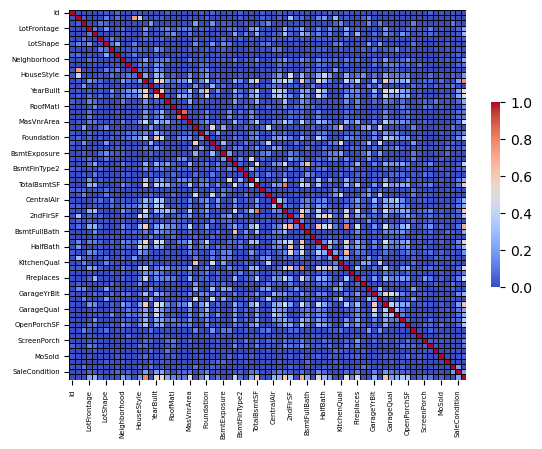

In [592]:
heatmap = sns.heatmap(df.corr(), annot=False,            # Добавляем числовые значения в ячейки
                      fmt=".2f",             # Формат чисел с двумя знаками после запятой
                      cmap="coolwarm",       # Цветовая палитра
                      linewidths=0.4,        # Толщина линий между ячейками
                      linecolor='black',     # Цвет линий между ячейками
                      cbar_kws={'shrink': 0.5},  # Размер цветовой шкалы (cbar)
                      vmin=0, vmax=1)
plt.xticks(rotation=90, fontsize=5)  # Устанавливаем шрифт меток оси X
plt.yticks(rotation=0, fontsize=5)
plt.show()

In [598]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [602]:
хитмап не помог смотрим через матрицу

SyntaxError: invalid syntax (3455074353.py, line 1)

In [604]:
core = df.corr()

In [610]:
high_corr = core[(core > 0.8) | (core < -0.8)]

In [618]:
high_corr_pairs = high_corr.stack().reset_index()

In [628]:
high_corr_pairs.sort_values(0)

,level_0,level_1,0
41,1stFlrSF,TotalBsmtSF,0.819530
36,TotalBsmtSF,1stFlrSF,0.819530
54,TotRmsAbvGrd,GrLivArea,0.825489
46,GrLivArea,TotRmsAbvGrd,0.825489
21,Exterior2nd,Exterior1st,0.854163
20,Exterior1st,Exterior2nd,0.854163
55,TotRmsAbvGrd,TotRmsAbvGrd,1.000000
53,KitchenQual,KitchenQual,1.000000
52,KitchenAbvGr,KitchenAbvGr,1.000000
51,BedroomAbvGr,BedroomAbvGr,1.000000


In [ ]:
смотрим на признаки и делаем решение

In [632]:
df[['Exterior1st', 'Exterior2nd', 'SalePrice']].corr()

,Exterior1st,Exterior2nd,SalePrice
Exterior1st,1.000000,0.854163,0.103551
Exterior2nd,0.854163,1.000000,0.103766
SalePrice,0.103551,0.103766,1.000000


In [634]:
df = df.drop('Exterior2nd', axis = 1)

✅ Найдите признаки с максимальным и минимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

In [638]:
df.corr()['SalePrice'].sort_values()

ExterQual       -0.636884
BsmtQual        -0.593734
KitchenQual     -0.589189
GarageFinish    -0.425684
GarageType      -0.415283
HeatingQC       -0.400178
BsmtExposure    -0.309043
LotShape        -0.255580
MSZoning        -0.166872
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
Heating         -0.098812
BsmtFinType1    -0.098734
FireplaceQu     -0.097176
BldgType        -0.085591
MSSubClass      -0.084284
OverallCond     -0.077856
LotConfig       -0.067396
SaleType        -0.054911
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
LandContour      0.015453
Street           0.041036
3SsnPorch        0.044584
MoSold           0.046432
BsmtFinType2     0.072717
Condition1       0.091155
BsmtCond         0.091503
PoolArea         0.092404
Exterior1st      0.103551
ScreenPorch      0.111447
Functional       0.115328
ExterCond        0.117303
RoofMatl         0.132383
BedroomAbvGr

✅ Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального, можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). 

Подсказка: воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

ВАЖНО: далее используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.

In [642]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

(array([ 11.,  38.,  99., 232., 273., 218., 176., 104.,  93.,  58.,  42.,
         35.,  24.,  10.,  17.,   8.,   7.,   4.,   2.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667,
        610980.        , 634983.33333333, 658986.66666667, 682990.        ,
        706993.33333333, 730996.66666667, 755000.        ]),
 <BarContainer object of 30 artists>)

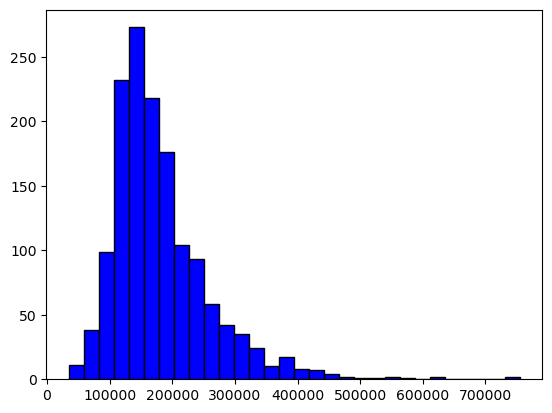

In [640]:
plt.hist(df['SalePrice'], bins=30, color='blue', edgecolor='black')

(array([  3.,   2.,   0.,   2.,   3.,   7.,   5.,  10.,  39.,  35.,  49.,
        100., 138., 186., 146., 156., 142., 102., 100.,  68.,  52.,  44.,
         22.,  24.,  12.,   4.,   3.,   3.,   1.,   2.]),
 array([10.46027076, 10.56274421, 10.66521767, 10.76769112, 10.87016457,
        10.97263803, 11.07511148, 11.17758493, 11.28005839, 11.38253184,
        11.48500529, 11.58747874, 11.6899522 , 11.79242565, 11.8948991 ,
        11.99737256, 12.09984601, 12.20231946, 12.30479292, 12.40726637,
        12.50973982, 12.61221328, 12.71468673, 12.81716018, 12.91963363,
        13.02210709, 13.12458054, 13.22705399, 13.32952745, 13.4320009 ,
        13.53447435]),
 <BarContainer object of 30 artists>)

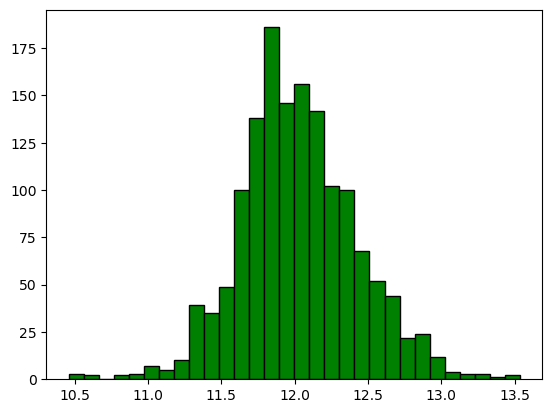

In [644]:
plt.hist(np.log1p(df['SalePrice']), bins=30, color='green', edgecolor='black')

In [647]:
df['SalePrice'] = np.log1p(df['SalePrice'])

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
30      10.596660
31      11.914055
32      12.100162
33      12.016733
34      12.533580
35      12.641100
36      11.884496
37      11.938200
38      11.599112
39      11.314487
40      11.982935
41      12.043560
42      11.877576
43      11.777219
44      11.856522
45      12.675767
46      12.387089
47      12.428019
48      11.635152
49      11.751950
50      12.083911
51      11.648339
52      11.608245
53      12.861001
54      11.775297
55      12

✅ Разбейте выборку на обучающую и тестовую в отношении 75:25. Зафиксируйте при разбиении значение `random_state` = 13. Не забывайте прологорифмировать целевую переменную (как в предыдущем задании)

In [663]:
X = df.drop('SalePrice', axis = 1)

In [665]:
y = df['SalePrice']

In [667]:
from sklearn.model_selection import train_test_split

In [669]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=13)

In [671]:
from sklearn.preprocessing import StandardScaler

In [673]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

✅ Примените к данным 

- Линейную регрессию
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрикам 
- RMSE 
- MAE
- $R^2$

Опишите полученные результаты.

In [755]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [759]:
ln = LinearRegression()

In [761]:
lin_cv_mse = cross_val_score(ln, X_train, y_train, cv=5 , scoring ='neg_mean_squared_error')

In [763]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [765]:
np.sqrt(lin_cv_mse * (-1))

array([0.24148653, 0.12654221, 0.13824343, 0.14690373, 0.13207042])

In [ ]:
lin_cv_mse = cross_val_score(ln, X_train, y_train, cv=5 , scoring ='')

In [ ]:
обучаем регрессию 

In [903]:
ln.fit(X_train, y_train)

LinearRegression()

In [905]:
mean_absolute_error(y_test, ln.predict(X_test))


0.10601716440970911

In [937]:
pd.DataFrame({'y_test': y_test, 'y_pred': ln.predict(X_test)})

,y_test,y_pred
662,11.608245,11.876347
1187,12.476104,12.458683
1305,12.691584,12.634841
945,11.735277,11.806309
269,11.904974,12.027413
916,10.471978,11.162054
826,11.603689,11.519582
481,12.832014,12.699285
1451,12.567555,12.436439
1308,11.898195,11.876857


In [907]:
np.sqrt(mean_squared_error(y_test, ln.predict(X_test)))


0.17064331600539784

In [909]:
r2_score(y_test, ln.predict(X_test))

0.878540166557864

In [743]:
y_test.mean()

12.00799057092575

In [753]:
from sklearn.linear_model import LassoCV

In [767]:
La_CV = LassoCV(cv = 5, n_alphas=15, random_state=13).fit(X_train, y_train)

In [775]:
p1 = La_CV.alphas_
p2 = La_CV.mse_path_

In [785]:
a=[]
for i in range(len(p2)):
    k = p2[i].mean()
    a.append(k)

In [791]:
asmdkd = pd.DataFrame({"MSE_1": pd.Series(a), "alpha_1": pd.Series(p1)})


In [793]:
asmdkd

,MSE_1,alpha_1
0,0.156870,0.323789
1,0.091093,0.197686
2,0.056922,0.120695
3,0.041148,0.073689
4,0.033431,0.044990
5,0.029523,0.027468
6,0.026428,0.016771
7,0.025165,0.010239
8,0.024965,0.006251
9,0.025116,0.003817


In [797]:
from sklearn.linear_model import Lasso

In [799]:
lasso = Lasso(alpha = 0.001)

In [801]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [807]:
np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))

0.166778824546918

In [809]:
mean_absolute_error(y_test, lasso.predict(X_test))

0.10322317733251048

In [811]:
r2_score(y_test, lasso.predict(X_test))

0.8839791789132122

In [813]:
from sklearn.linear_model import RidgeCV

In [939]:
rg_cv = RidgeCV(alphas=[0.01, 1.0, 5, 10,  100.0, 1000], store_cv_values=True)

In [941]:
rg_cv.fit(X_train, y_train)

RidgeCV(alphas=[0.01, 1.0, 5, 10, 100.0, 1000], store_cv_values=True)

In [943]:
rg_cv.alpha_


100.0

In [873]:
from sklearn.linear_model import Ridge

In [875]:
ridge = Ridge(alpha = 100)

In [877]:
ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [881]:
np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))

0.1736412670761876

In [889]:
mean_absolute_error(y_test, ridge.predict(X_test))

0.10963237525989847

In [891]:
r2_score(y_test, ridge.predict(X_test))

0.874234937790414

✅ Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения, проанализируйте результаты.

In [911]:
ln_weights = ln.coef_
lasso_weights = lasso.coef_
ridge_weights = ridge.coef_

In [913]:
lasso_weights

array([-2.88890234e-03, -1.20636018e-02, -1.32805173e-02, -5.53355930e-03,
        1.76727919e-02,  1.06045588e-02, -6.82552067e-03,  3.89950965e-03,
       -1.39787291e-03,  4.41174420e-03,  9.81380909e-04, -1.19968272e-02,
       -8.73547165e-03,  9.63120814e-02,  4.14282218e-02,  4.10876282e-02,
        1.60242868e-02,  4.67593726e-03,  5.47815005e-03, -2.98749404e-03,
        5.08469419e-04, -3.86466568e-03,  7.33886946e-03,  7.73821470e-03,
       -1.62324969e-02,  4.23230024e-03, -1.37003914e-02, -1.49745045e-02,
        0.00000000e+00,  4.81953382e-03,  4.97355302e-03,  0.00000000e+00,
        1.63000416e-02, -1.01959022e-03, -1.29093000e-02,  1.63566055e-02,
       -4.58229382e-05,  1.04149566e-02,  0.00000000e+00, -5.75553701e-04,
        9.36251968e-02,  2.97774404e-02,  3.48834824e-03,  1.84541318e-02,
        8.79701809e-03,  2.88008027e-03, -6.91215068e-03, -1.65844417e-02,
        2.05063185e-02,  1.39925524e-02,  2.58599214e-02, -6.75032887e-03,
       -1.09582479e-02,  

Text(0, 0.5, 'Частота')

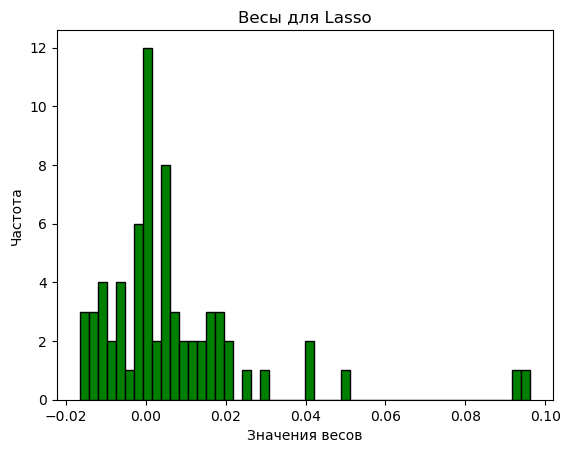

In [949]:

plt.hist(lasso_weights, bins=50, color='green', edgecolor='black')
plt.title('Весы для Lasso')
plt.xlabel('Значения весов')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

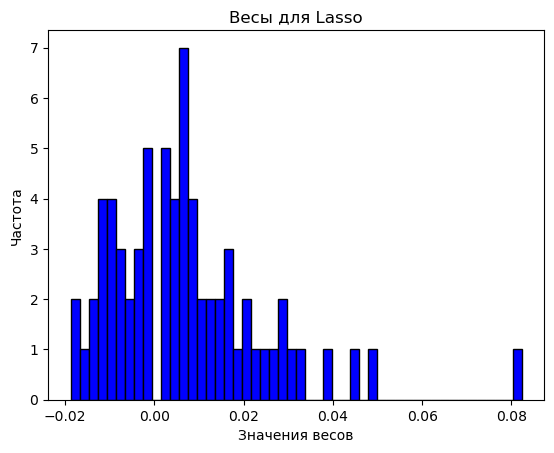

In [947]:
plt.hist(ridge_weights, bins=50, color='blue', edgecolor='black')
plt.title('Весы для Lasso')
plt.xlabel('Значения весов')
plt.ylabel('Частота')



Text(0, 0.5, 'Частота')

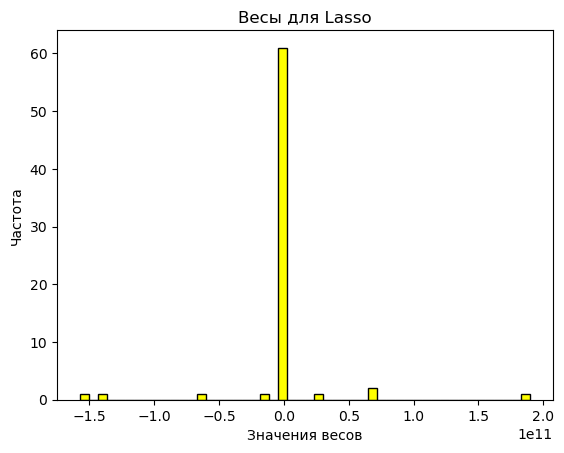

In [951]:
plt.hist(ln_weights, bins=50, color='yellow', edgecolor='black')
plt.title('Весы для Lasso')
plt.xlabel('Значения весов')
plt.ylabel('Частота')
